# LEVEL 2 - GEDI Level 2A Geolocated Elevation and Height Metrics product

https://lpdaac.usgs.gov/products/gedi02_av001/  
The purpose of the GEDI Level 2A Geolocated Elevation and Height Metrics product (GEDI02_A) is to provide waveform interpretation and extracted products from each GEDI01_B received waveform, including ground elevation, canopy top height, and relative height (RH) metrics. The methodology for generating the GEDI02_A product datasets is adapted from the Land, Vegetation, and Ice Sensor (LVIS) algorithm. The GEDI01_B product is provided in HDF5 format and has a spatial resolution (average footprint) of 25 meters.

In [7]:
from pyGEDI import *

Select the file of Product GEDI0A_B with the date of interest. This will be read as an h5 file which will be used to extrapolate ground elevation, canopy top height, and relative height (RH) metrics.


In [8]:
fileh5_2A='data/GEDI02_A_2019266053504_O04415_T03172_02_001_01.h5'
h5_2A=getH5(fileh5_2A)

Define the coordinates of your specific area of interest. The next line will exhibit an example using coordinates in Brazil.

In [9]:
ul_lat=41.78174686595749
ul_lon=-84.76966538940911
lr_lat=37.816498862018186
lr_lon=-88.05457749878411

# -88.05457749878411, 37.816498862018186, -84.76966538940911, 41.78174686595749

bbox=[ul_lat,ul_lon,lr_lat,lr_lon]

The GEDI02_A data product contains 156 layers for each of the eight beams, including ground elevation, canopy top height, relative return energy metrics (describing canopy vertical structure, for example), and many other interpreted products from the return waveforms. Additional information for the layers can be found in the GEDI Level 2A Dictionary. https://lpdaac.usgs.gov/documents/586/gedi_l2a_dictionary_P001_v1.html

To visualize the different layers

In [10]:
getLayer('',[h5_2A])

{'data/GEDI02_A_2019266053504_O04415_T03172_02_001_01.h5': ['ancillary/l2a_alg_count',
  'beam',
  'channel',
  'degrade_flag',
  'delta_time',
  'digital_elevation_model',
  'elev_highestreturn',
  'elev_lowestmode',
  'elevation_bias_flag',
  'elevation_bin0_error',
  'energy_total',
  'geolocation/elev_highestreturn_a1',
  'geolocation/elev_highestreturn_a2',
  'geolocation/elev_highestreturn_a3',
  'geolocation/elev_highestreturn_a4',
  'geolocation/elev_highestreturn_a5',
  'geolocation/elev_highestreturn_a6',
  'geolocation/elev_lowestmode_a1',
  'geolocation/elev_lowestmode_a2',
  'geolocation/elev_lowestmode_a3',
  'geolocation/elev_lowestmode_a4',
  'geolocation/elev_lowestmode_a5',
  'geolocation/elev_lowestmode_a6',
  'geolocation/elev_lowestreturn_a1',
  'geolocation/elev_lowestreturn_a2',
  'geolocation/elev_lowestreturn_a3',
  'geolocation/elev_lowestreturn_a4',
  'geolocation/elev_lowestreturn_a5',
  'geolocation/elev_lowestreturn_a6',
  'geolocation/elevation_1gfit',
  

To see if a specific layer exists or not:

In [11]:
idsbox=idsBox(h5_2A,'lat_lowestmode','lon_lowestmode',bbox)

**For example:** With the Box defined the different layers can be extracted from product GEDI02_A for the area of interest. 

In [12]:
layers=['shot_number','lat_lowestmode','lon_lowestmode', 'sensitivity','quality_flag','rh']
dfbox=generateBoxDataFrame([h5_2A],layers,idsbox)
dfbox.head()

,shot_number,lat_lowestmode,lon_lowestmode,sensitivity,quality_flag,rh


The following example calculates the maximum layer rh and is added in the dataframe. Other variables (e.g median, mean, std, pcr75, pcr90) can also be calculated for layers of interest.

In [13]:
dfbox['max_rh'] = [np.max(i) for i in dfbox['rh']]
dfbox.head()

,shot_number,lat_lowestmode,lon_lowestmode,sensitivity,quality_flag,rh,max_rh


Now that the data frame is created, export files in the different formats (csv, shp, tif) based on GDAL. These may all be opened in other programs (e.g. Excel, QGIS).

#### Dataframe to CSV:

In [14]:
df2csv(dfbox,filename='Box_GEDI02_A',outdir='data/formats/')

'DataFrame successfully converted.'

#### CSV to SHP:

In [15]:
csv2shp('data/formats/Box_GEDI02_A.csv',filename='Box_GEDI02_A',outdir='data/formats/')

Successfully created


'File successfully converted.'

#### SHP to TIF:

Note: Given that GEDI is 25m the pixel used must be of 0.00025. Float is recommended. Define the variable of interest for band(1) (e.g. height in centimeters or meters).

In [16]:
shp2tiff('data/formats/Box_GEDI02_A.shp', layername='max_rh', 
        pixelsize='0.00025', 
        nodata='225', 
        ot='float',
        filename='Box_GEDI02_A',
        outdir='data/formats/')

'SHP file does not exist'

# Visualization and Analysis

Now that the file has been created as shp or tif, visualization and analysis are possible.

### Please note you will need these packages:


In [17]:
import geopandas as gpd
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import folium

The following data analyses are from  Democratic Republic of the Congo where various variables were calculated that pertain to GEDI product 2A. Variables tcc, tch75, tch90, tch95, tch100, are the percentile result from layer rh.

#### To visualize in shp format and an attributes table

ValueError: aspect must be finite and positive 

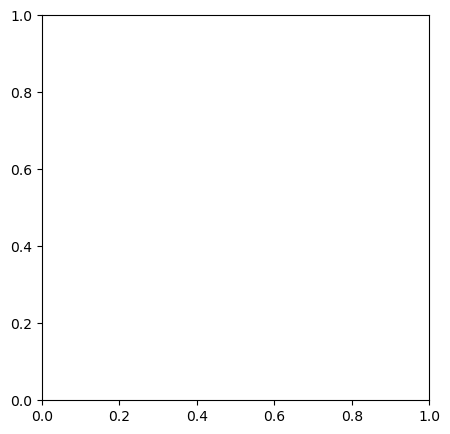

In [19]:
GEDI_shp = gpd.read_file('data/formats/Box_GEDI02_A.shp')
plotSHP(GEDI_shp,'tch75',colormap='Spectral_r')
GEDI_shp.head()

#### 3D Graph of Latitude, Longitude, and Height(tch75) of Congo

KeyError: 'lat'

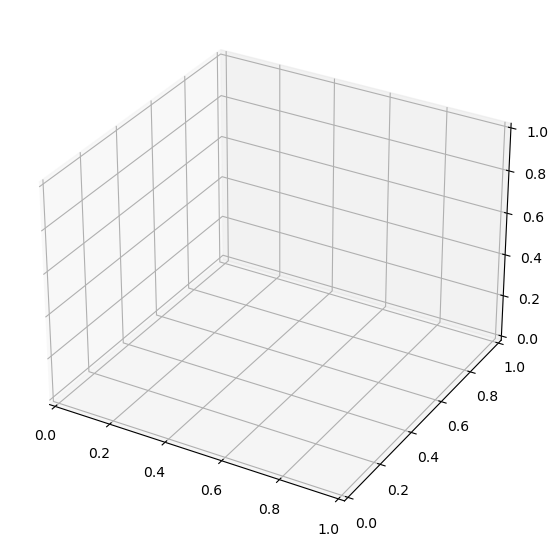

In [20]:
fig1=plt.figure(figsize=(15,15))
ax=fig1.add_subplot(211,projection='3d')
data = [GEDI_shp['lat'], GEDI_shp['lon'], GEDI_shp['tch75']]
AX = ax.scatter(*data, c=data[2], vmin=0, vmax=30, cmap='BuGn')
ax.view_init(15,30)
plt.colorbar(AX)

#### To visualize a Height (tch75) Histogram.

In [ ]:
GEDI_raster = 'data/formats/tch75_DRC.tif'
histRaster(GEDI_raster,bins=40)